In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# The Mauna Loa CO_2 Concentration

In [46]:
column_names = [
    'Year', 'Month', 'Date1', 'Date2',
    'CO2', 'CO2_season_adj', 'Fit',
    'Fit_season_adj', 'CO2_filled', 'season_adj_filled'
]

CO_2 = pd.read_csv('../../data/Homework4/CO2.csv',     
    skiprows=57,
    names=column_names,
    )

CO_2 = CO_2.replace(-99.99, np.nan)

In [47]:
CO_2.head(10)

,Year,Month,Date1,Date2,CO2,CO2_season_adj,Fit,Fit_season_adj,CO2_filled,season_adj_filled
0,1958,1,21200,1958.0411,NaN,NaN,NaN,NaN,NaN,NaN
1,1958,2,21231,1958.1260,NaN,NaN,NaN,NaN,NaN,NaN
2,1958,3,21259,1958.2027,315.70,314.43,316.19,314.90,315.70,314.43
3,1958,4,21290,1958.2877,317.45,315.16,317.30,314.98,317.45,315.16
4,1958,5,21320,1958.3699,317.51,314.71,317.86,315.06,317.51,314.71
5,1958,6,21351,1958.4548,NaN,NaN,317.24,315.14,317.24,315.14
6,1958,7,21381,1958.5370,315.86,315.19,315.86,315.21,315.86,315.19
7,1958,8,21412,1958.6219,314.93,316.19,313.99,315.29,314.93,316.19
8,1958,9,21443,1958.7068,313.21,316.08,312.46,315.35,313.21,316.08
9,1958,10,21473,1958.7890,NaN,NaN,312.44,315.40,312.44,315.40


In [48]:
data_CO2 = CO_2[['Year','Month','Date2', 'CO2']].copy()
data_CO2["i"] = np.arange(1, len(data_CO2)+1)

data_CO2["X"] = (data_CO2["i"] + 0.5)/12
data_CO2["X_2"] = data_CO2["X"]**2
data_CO2["X_3"] = data_CO2["X"]**3

data_CO2 = data_CO2.dropna()
data_CO2.head()

,Year,Month,Date2,CO2,i,X,X_2,X_3
2,1958,3,1958.2027,315.70,3,0.291667,0.085069,0.024812
3,1958,4,1958.2877,317.45,4,0.375000,0.140625,0.052734
4,1958,5,1958.3699,317.51,5,0.458333,0.210069,0.096282
6,1958,7,1958.5370,315.86,7,0.625000,0.390625,0.244141
7,1958,8,1958.6219,314.93,8,0.708333,0.501736,0.355396


In [72]:
def model_experiment(df: pd.DataFrame, features: list, target: str):
    
    df_model = df.copy()

    X = df_model[features]
    y = df_model[target]

    train_test_split = int(len(df_model) * 0.8)
    X_train, X_test = X[:train_test_split], X[train_test_split:]
    y_train, y_test = y[:train_test_split], y[train_test_split:]

    model = LinearRegression()
    model.fit(X_train, y_train)

    print(f'intercepto: {model.intercept_}')
    print(f'pendientes: {model.coef_}')

    df_model['predictions'] = model.predict(X)
    df_model['residuals'] = df_model[target] - df_model['predictions']

    # Metrics test data
    
    y_pred = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape * 100}%")

    # Scatter plot rasiduals for train data

    y_pred_train = model.predict(X_train)
    residuals = y_train - y_pred_train

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred_train, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted Values")
    plt.show()

    return df_model, model

## Fiting Linear Model

intercepto: 308.87443246991484
pendientes: [1.40669115]
RMSE: 10.641458521874656
MAPE: 2.4504549564431386%


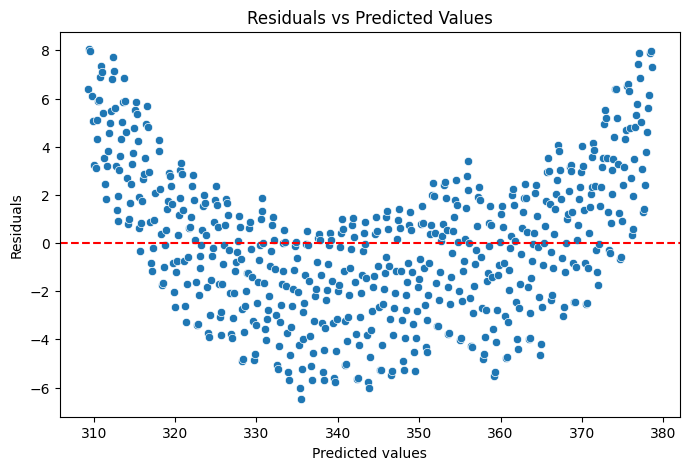

In [73]:
df_lineal, model_lineal = model_experiment(data_CO2, features = ['X'], target = 'CO2')

## Fitting Quadratic Model

intercepto: 314.03382691795764
pendientes: [0.80007744 0.0121175 ]
RMSE: 2.50133221948978
MAPE: 0.5320319129740845%


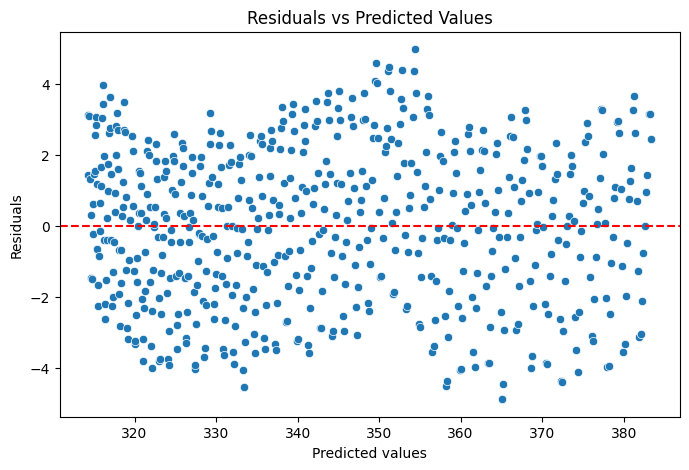

In [74]:
df_quadratic, model_quadratic = model_experiment(data_CO2, features = ['X','X_2'], target = 'CO2')

## Fitting a Cubic Model

intercepto: 314.8065971460436
pendientes: [ 6.21400016e-01  2.09871482e-02 -1.18323397e-04]
RMSE: 4.149370712134893
MAPE: 0.8483502723897489%


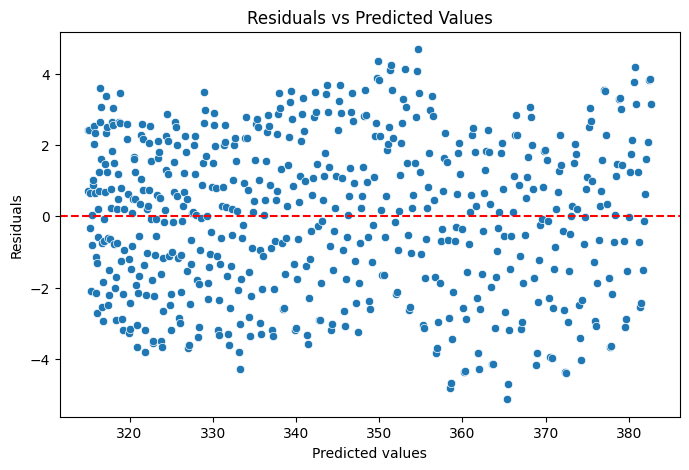

In [75]:
df_cubic, model_cubic = model_experiment(data_CO2, features = ['X','X_2','X_3'], target = 'CO2')

## Fitting a Periodic Signal

In [83]:
df_quadratic.tail()

,Year,Month,Date2,CO2,i,X,X_2,X_3,predictions,residuals
736,2019,5,2019.3699,414.83,737,61.458333,3777.126736,232135.913990,408.974585,5.855415
737,2019,6,2019.4548,413.96,738,61.541667,3787.376736,233081.476635,409.165462,4.794538
738,2019,7,2019.5370,411.85,739,61.625000,3797.640625,234029.603516,409.356508,2.493492
739,2019,8,2019.6219,410.08,740,61.708333,3807.918403,234980.298105,409.547722,0.532278
740,2019,9,2019.7068,408.55,741,61.791667,3818.210069,235933.563874,409.739105,-1.189105


In [92]:
train_test_split = int(len(df_quadratic) * 0.8)
train_set, test_set = df_quadratic[:train_test_split], df_quadratic[train_test_split:]

In [95]:
train_set

,Year,Month,Date2,CO2,i,X,X_2,X_3,predictions,residuals
2,1958,3,1958.2027,315.70,3,0.291667,0.085069,0.024812,314.268214,1.431786
3,1958,4,1958.2877,317.45,4,0.375000,0.140625,0.052734,314.335560,3.114440
4,1958,5,1958.3699,317.51,5,0.458333,0.210069,0.096282,314.403075,3.106925
6,1958,7,1958.5370,315.86,7,0.625000,0.390625,0.244141,314.538609,1.321391
7,1958,8,1958.6219,314.93,8,0.708333,0.501736,0.355396,314.606628,0.323372
...,...,...,...,...,...,...,...,...,...,...
589,2007,2,2007.1260,383.71,590,49.208333,2421.460069,119156.014251,382.746346,0.963654
590,2007,3,2007.2027,384.34,591,49.291667,2429.668403,119762.405020,382.912483,1.427517
591,2007,4,2007.2877,386.23,592,49.375000,2437.890625,120370.849609,383.078789,3.151211
592,2007,5,2007.3699,386.41,593,49.458333,2446.126736,120981.351490,383.245264,3.164736


In [112]:
fitting_periodic_signal = train_set.groupby('Month')['residuals'].mean().reset_index()
fitting_periodic_signal

,Month,residuals
0,1,-0.012919
1,2,0.646407
2,3,1.355569
3,4,2.561858
4,5,2.982891
5,6,2.316473
6,7,0.776297
7,8,-1.301213
8,9,-3.128074
9,10,-3.309520


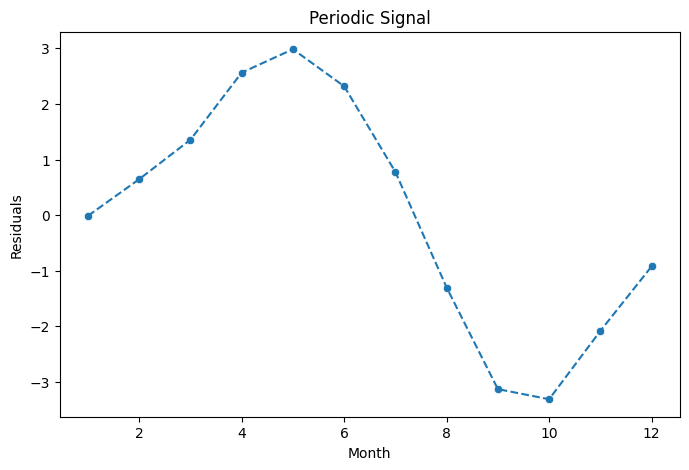

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x = fitting_periodic_signal['Month'], 
                y = fitting_periodic_signal['residuals'])
sns.lineplot(x = fitting_periodic_signal['Month'], 
         y = fitting_periodic_signal['residuals'], 
         linestyle='--')
plt.xlabel("Month")
plt.title("Periodic Signal")
plt.ylabel("Residuals")
plt.show()

In [113]:
df_model_final = pd.merge(df_quadratic, fitting_periodic_signal, on='Month')
df_model_final['final_fit'] = df_model_final['predictions'] + df_model_final['residuals_y']
df_model_final.head()

,Year,Month,Date2,CO2,i,X,X_2,X_3,predictions,residuals_x,residuals_y,final_fit
0,1958,3,1958.2027,315.70,3,0.291667,0.085069,0.024812,314.268214,1.431786,1.355569,315.623783
1,1958,4,1958.2877,317.45,4,0.375000,0.140625,0.052734,314.335560,3.114440,2.561858,316.897418
2,1958,5,1958.3699,317.51,5,0.458333,0.210069,0.096282,314.403075,3.106925,2.982891,317.385965
3,1958,7,1958.5370,315.86,7,0.625000,0.390625,0.244141,314.538609,1.321391,0.776297,315.314906
4,1958,8,1958.6219,314.93,8,0.708333,0.501736,0.355396,314.606628,0.323372,-1.301213,313.305416


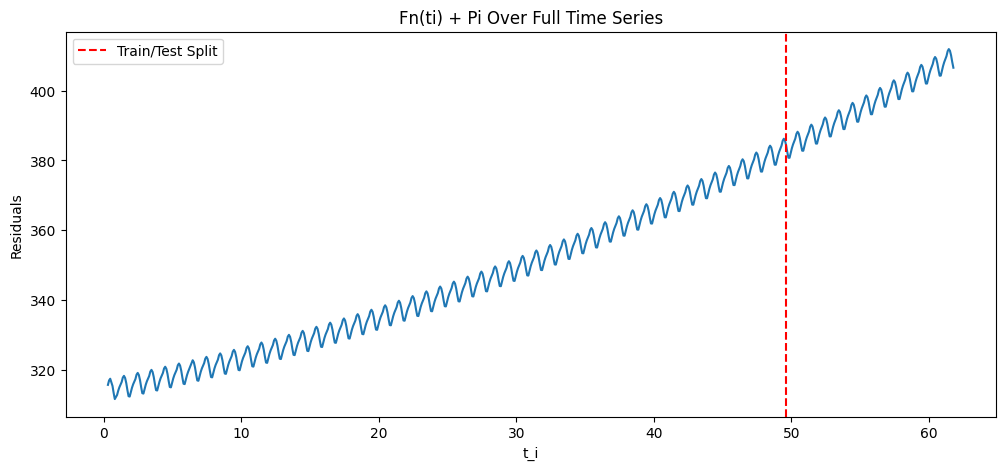

In [130]:
split = int(len(df_model_final) * 0.8)

plt.figure(figsize=(12, 5))
plt.plot(df_model_final['X'], 
                df_model_final['final_fit'])
plt.axvline(df_model_final["X"].iloc[split], color="red", linestyle="--",
            label="Train/Test Split")
plt.xlabel("t_i")
plt.title("Fn(ti) + Pi Over Full Time Series")
plt.ylabel("Residuals")
plt.legend()
plt.show()

In [133]:
train_test_split = int(len(df_model_final) * 0.8)
train_set, test_set = df_model_final[:train_test_split], df_model_final[train_test_split:]

rmse = root_mean_squared_error(test_set['CO2'], test_set['final_fit'])
mape = mean_absolute_percentage_error(test_set['CO2'], test_set['final_fit'])

print(f"Final Model RMSE: {rmse}")
print(f"Final Model MAPE: {mape * 100}%")

Final Model RMSE: 1.1493602690794378
Final Model MAPE: 0.20859165947990974%


In [134]:
range_F = df_model_final["predictions"].max() - df_model_final["predictions"].min()
amplitude_P = df_model_final["residuals_y"].max() - df_model_final["residuals_y"].min()
df_model_final["residual_final"] = df_model_final["CO2"] - df_model_final["predictions"] - df_model_final["residuals_y"]
range_R = df_model_final["residual_final"].max() - df_model_final["residual_final"].min()

ratio_F_P = range_F / amplitude_P
ratio_P_R = amplitude_P / range_R

print(f"Ratio F/P: {ratio_F_P}")
print(f"Ratio P/R: {ratio_P_R}")

Ratio F/P: 15.172387184232884
Ratio P/R: 1.334142783925268


In [ ]:
# Ratio F/P : La tendencia a largo plazo es 15 veces más grande que el ciclo estacional.
# El cambio de CO₂ desde 1958 hasta hoy es muy grande (subida fuerte).

# La oscilación mensual estacional es mucho más pequeña.



# Ratio P/R: El ciclo estacional solo es 1.33 veces más grande que el residuo final.
# Esto significa:

# El ruido es casi tan grande como la señal estacional P(t).

# La separación entre ciclo estacional y ruido no es clara.

# La señal periódica no es tan dominante sobre el ruido como debería.


# Conclusión final (lo que debes responder en el examen)

# La descomposición NO es completamente significativa, porque aunque:

# la tendencia domina ampliamente sobre la estacionalidad,

# la estacionalidad no domina de forma clara sobre el residual, ya que:

# amplitud
# (
# 𝑃
# )
# rango
# (
# 𝑅
# )
# ≈
# 1.33
# rango(R)
# amplitud(P)
# 	​

# ≈1.33

# Esto implica que:

# La señal periódica no es mucho más grande que el ruido.

# El residuo aún contiene variabilidad comparable al ciclo estacional.

# El modelo podría mejorar (quizás capturar no linealidades o cambios en amplitud estacional a lo largo del tiempo).

# CPI and BER Data Analysis

In [29]:
cpi = pd.read_csv('../../data/Homework4/CPI.csv')
t10yie = pd.read_csv('../../data/Homework4/T10YIE.csv')
display(cpi.head(3))
display(t10yie.head(3))

,date,CPI
0,7/24/2008,100.0
1,7/25/2008,100.0
2,7/26/2008,100.0


,DATE,T10YIE
0,2003-01-02,1.64
1,2003-01-03,1.62
2,2003-01-06,1.63


In [4]:
cpi['date'] = pd.to_datetime(cpi['date'])
# cpi.dropna(inplace=True)

In [5]:
cpi_monthly = cpi.set_index('date').resample('MS').first().reset_index()
cpi_monthly.head()

,date,CPI
0,2008-07-01,100.00000
1,2008-08-01,100.52510
2,2008-09-01,100.12380
3,2008-10-01,99.98538
4,2008-11-01,98.97539


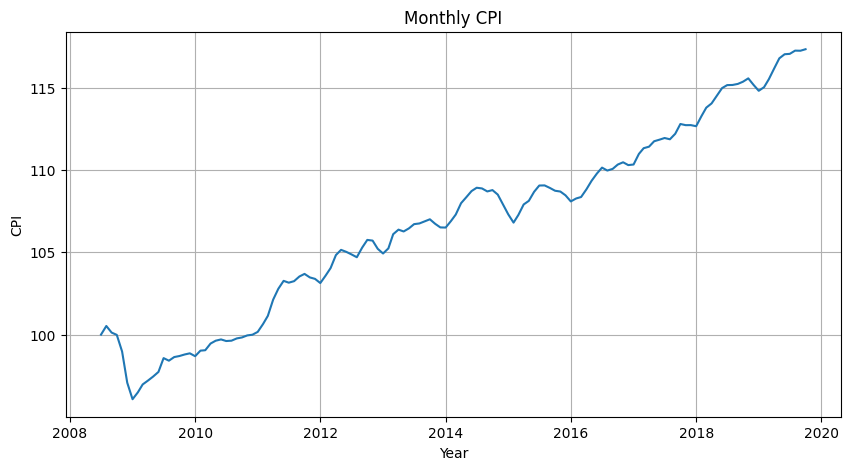

In [69]:
plt.figure(figsize=(10,5))
plt.plot(cpi_monthly['date'], cpi_monthly['CPI'])
plt.title("Monthly CPI")
plt.xlabel("Year")
plt.ylabel("CPI")
plt.grid(True)
plt.show()

In [70]:
train = cpi_monthly[cpi_monthly['date'] < '2013-09-01']
test = cpi_monthly[cpi_monthly['date'] >= '2013-09-01']

In [71]:
len(cpi_monthly.date)-len(train)

75

In [72]:
t =np.arange(1, len(train) + 1)
y = train['CPI'].values

In [73]:
model = LinearRegression()
model.fit(t.reshape(-1,1), y)

print(f'intercepto: {model.intercept_}')
print(f'pendiente: {model.coef_}')

intercepto: 96.5682828450555
pendiente: [0.16104348]


In [74]:
y_pred_train = model.predict(t.reshape(-1,1))

residuals = y - y_pred_train

max_residual = np.max(np.abs(residuals))
max_residual

np.float64(3.63473018760547)

## AR Model: Determine the Lag

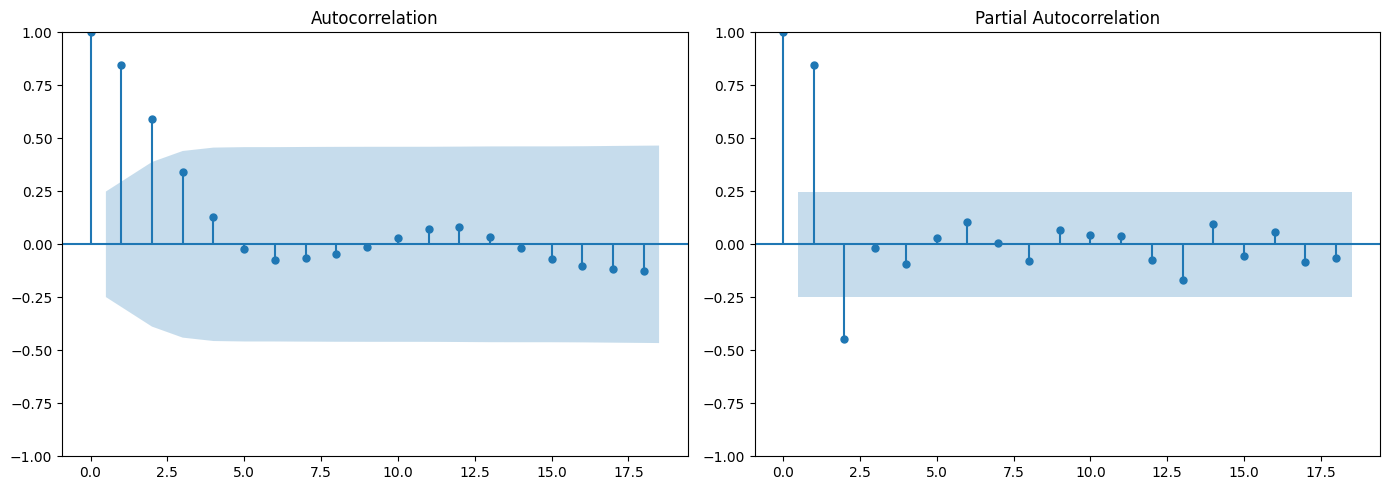

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14,5))

plot_acf(residuals, ax=axes[0])
plot_pacf(residuals, ax=axes[1])

plt.tight_layout()
plt.show()

In [76]:
model = AutoReg(residuals, lags=2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:                     AutoReg(2)   Log Likelihood                 -17.470
Method:               Conditional MLE   S.D. of innovations              0.324
Date:                Thu, 13 Nov 2025   AIC                             42.939
Time:                        20:32:04   BIC                             51.317
Sample:                             2   HQIC                            46.216
                                   62                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0431      0.042     -1.024      0.306      -0.126       0.039
y.L1           1.3237      0.098     13.461      0.000       1.131       1.516
y.L2          -0.5308      0.091     -5.824      0.000      -0.709      -0.352
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2469           -0.5738j            1.3726           -0.0686
AR.2            1.2469           +0.5738j            1.3726            0.0686
-----------------------------------------------------------------------------
"""

In [82]:
start = len(residuals)
end = start + len(test) - 1

pred_test = model.predict(start=start, end=end)
pred_test = pd.Series(pred_test, index=test.index)
valid_idx = test['CPI'].dropna().index
test_clean = test.loc[valid_idx]
pred_test_clean = pred_test.loc[valid_idx]


root_mean_squared_error(test_clean['CPI'].values,pred_test_clean)

111.31776724043668

In [81]:
pred_test

array([ 0.0540157 , -0.07889152, -0.17620222, -0.23446224, -0.25992675,
       -0.26270897, -0.25287522, -0.23838181, -0.22441713, -0.21362561,
       -0.20675368, -0.20338564, -0.20257509, -0.20328994, -0.2046664 ,
       -0.20610894, -0.20728774, -0.2080824 , -0.20850855, -0.20865083,
       -0.20861296, -0.20848731, -0.2083411 , -0.20821425, -0.20812396,
       -0.20807177, -0.20805062, -0.20805033, -0.20806116, -0.20807566,
       -0.2080891 , -0.2080992 , -0.20810542, -0.20810831, -0.20810882,
       -0.20810797, -0.20810657, -0.20810517, -0.20810406, -0.20810333,
       -0.20810296, -0.20810285, -0.20810291, -0.20810304, -0.20810318,
       -0.2081033 , -0.20810338, -0.20810343, -0.20810345, -0.20810345,
       -0.20810343, -0.20810342, -0.20810341, -0.2081034 , -0.20810339,
       -0.20810339, -0.20810339, -0.20810339, -0.20810339, -0.20810339,
       -0.20810339, -0.20810339, -0.20810339, -0.20810339, -0.20810339,
       -0.20810339, -0.20810339, -0.20810339, -0.20810339, -0.20

# Converting to Inflation Rates

In [10]:
cpi_monthly['IR'] = (cpi_monthly['CPI']-cpi_monthly['CPI'].shift(1))/cpi_monthly['CPI'].shift(1)
cpi_monthly['ln_CPI'] = np.log(cpi_monthly['CPI']/cpi_monthly['CPI'].shift(1)) 
cpi_monthly

,date,CPI,IR,ln_CPI
0,2008-07-01,100.00000,NaN,NaN
1,2008-08-01,100.52510,0.005251,0.005237
2,2008-09-01,100.12380,-0.003992,-0.004000
3,2008-10-01,99.98538,-0.001382,-0.001383
4,2008-11-01,98.97539,-0.010101,-0.010153
...,...,...,...,...
132,2019-07-01,117.05920,0.000199,0.000199
133,2019-08-01,117.25480,0.001671,0.001670
134,2019-09-01,117.24880,-0.000051,-0.000051
135,2019-10-01,117.34070,0.000784,0.000783


In [11]:
cpi_monthly[cpi_monthly['date'] == '2013-02-01']

,date,CPI,IR,ln_CPI
55,2013-02-01,105.2396,0.002957,0.002953


## Inflation Rate from BER

In [30]:
t10yie['DATE'] = pd.to_datetime(t10yie['DATE'])
t10yie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    4393 non-null   datetime64[ns]
 1   T10YIE  4215 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 68.8 KB


In [40]:
t10yie['year'] = t10yie['DATE'].dt.year
t10yie['month'] = t10yie['DATE'].dt.month
t10yie['BER_decimal'] = t10yie['T10YIE'] / 100
t10yie

,DATE,T10YIE,year,month,IR_monthly,BER_decimal
0,2003-01-02,1.64,2003,1,0.884335,0.0164
1,2003-01-03,1.62,2003,1,0.884335,0.0162
2,2003-01-06,1.63,2003,1,0.884335,0.0163
3,2003-01-07,1.62,2003,1,0.884335,0.0162
4,2003-01-08,1.71,2003,1,0.884335,0.0171
...,...,...,...,...,...,...
4388,2019-10-29,1.61,2019,10,0.885584,0.0161
4389,2019-10-30,1.57,2019,10,0.885584,0.0157
4390,2019-10-31,1.54,2019,10,0.885584,0.0154
4391,2019-11-01,1.59,2019,11,0.885584,0.0159


In [41]:
monthly_BER = t10yie.groupby(['year', 'month'])['BER_decimal'].mean()
IR_monthly = (1 + monthly_BER)**(1/12) - 1
IR_monthly = IR_monthly.reset_index()
IR_monthly

,year,month,BER_decimal
0,2003,1,0.001450
1,2003,2,0.001580
2,2003,3,0.001539
3,2003,4,0.001467
4,2003,5,0.001374
...,...,...,...
198,2019,7,0.001449
199,2019,8,0.001312
200,2019,9,0.001313
201,2019,10,0.001292


In [42]:
IR_monthly[(IR_monthly['year'] == 2013)&(IR_monthly['month'] == 2)]

,year,month,BER_decimal
121,2013,2,0.002104
